## Configure Notebook

In [2]:
# 3rd Party Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Data Gathering and Cleaning for Parks and Recreational Facilities

## Import Data

In [3]:
# Store Parks and Recreation Facilities Data as GeoDataFrame
parks = gpd.read_file("Parks and Recreation Facilities - 4326.shp")
parks.head()

,_id,LOCATIONID,ASSET_ID,ASSET_NAME,TYPE,AMENITIES,ADDRESS,PHONE,URL,geometry
0,1,298,1126.0,WILLIAMSON PARK RAVINE,Park,None,1680 GERRARD ST E,None,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.31736 43.67805)
1,2,2342,1328.0,GLENELLEN PARKETTE,Park,None,63 GLENELLEN DR E,None,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.49545 43.64062)
2,3,2281,1317.0,GATEWAY PARK,Park,None,40 EAST LIBERTY ST,None,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.41192 43.63933)
3,4,1030,964.0,SMITHWOOD PARK,Park,Playground,79 SMITHWOOD DR,None,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.55071 43.64089)
4,5,2544,816.0,PETER STREET BASIN PARK,Park,None,370 QUEENS QUAY W,None,https://www.toronto.ca/data/parks/prd/faciliti...,MULTIPOINT (-79.38975 43.63849)


In [4]:
# Explore GeoDataFrame Information
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   _id         1663 non-null   int64   
 1   LOCATIONID  1663 non-null   object  
 2   ASSET_ID    1663 non-null   float64 
 3   ASSET_NAME  1663 non-null   object  
 4   TYPE        1663 non-null   object  
 5   AMENITIES   1663 non-null   object  
 6   ADDRESS     1663 non-null   object  
 7   PHONE       1661 non-null   object  
 8   URL         1663 non-null   object  
 9   geometry    1663 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(7)
memory usage: 130.1+ KB


In [5]:
# Remove Irrelevant Columns
parks = parks.drop(["_id", "LOCATIONID", "ASSET_ID", "AMENITIES", "PHONE", "URL"], axis = 1)

In [6]:
# Explore TYPE Column
parks["TYPE"].unique()

array(['Park', 'Community Centre'], dtype=object)

<Axes: >

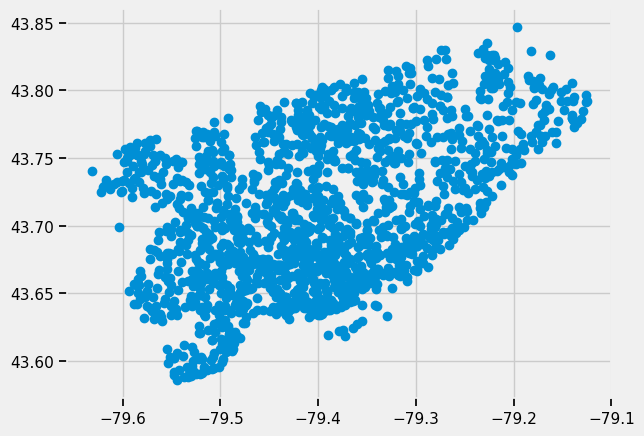

In [7]:
# Plot Data
parks.plot()

In [8]:
# Store Greenspace Data as GeoDataFrame
green_spaces = gpd.read_file("Green Spaces - 4326.shp")
green_spaces.head()

,_id1,AREA_ID2,AREA_AT3,PARENT_4,AREA_CL5,AREA_CL6,AREA_SH7,AREA_LO8,AREA_NA9,AREA_DE10,OBJECTI11,geometry
0,1,1,1,0,890.0,OTHER_CEMETERY,None,4009,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,1.0,"POLYGON ((-79.25752 43.82953, -79.25739 43.829..."
1,2,2,2,0,890.0,OTHER_CEMETERY,None,4010,HILLSIDE CEMETERY,HILLSIDE CEMETERY,2.0,"POLYGON ((-79.18962 43.82488, -79.18949 43.824..."
2,3,3,3,0,890.0,OTHER_CEMETERY,None,4011,HIGHLAND MEMORY GARDENS,HIGHLAND MEMORY GARDENS,3.0,"POLYGON ((-79.34758 43.8081, -79.34758 43.8081..."
3,4,4,4,0,890.0,OTHER_CEMETERY,None,4005,CHRISTIE'S METHODIST CEMETERY,CHRISTIE'S METHODIST CEMETERY,4.0,"POLYGON ((-79.31835 43.79902, -79.31851 43.799..."
4,5,5,5,0,890.0,OTHER_CEMETERY,None,4012,ST. PAUL'S ANGLICAN CHURCH CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,5.0,"POLYGON ((-79.31649 43.7964, -79.3165 43.79643..."


In [9]:
# Explore GeoDataFrame Information
green_spaces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3308 entries, 0 to 3307
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   _id1       3308 non-null   int64   
 1   AREA_ID2   3308 non-null   int64   
 2   AREA_AT3   3308 non-null   int64   
 3   PARENT_4   3308 non-null   int64   
 4   AREA_CL5   3308 non-null   float64 
 5   AREA_CL6   3308 non-null   object  
 6   AREA_SH7   3308 non-null   object  
 7   AREA_LO8   3308 non-null   object  
 8   AREA_NA9   3308 non-null   object  
 9   AREA_DE10  3308 non-null   object  
 10  OBJECTI11  3308 non-null   float64 
 11  geometry   3308 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(5)
memory usage: 310.3+ KB


In [10]:
# Remove Irrelevant Columns and Rename Columns
green_spaces = green_spaces[["AREA_CL6", "AREA_NA9", "geometry"]]
green_spaces = green_spaces.rename(columns={"AREA_CL6": "TYPE","AREA_NA9": "ASSET_NAME","geometry": "geometry"})
green_spaces.head()

,TYPE,ASSET_NAME,geometry
0,OTHER_CEMETERY,ARMADALE FREE METHODIST CEMETERY,"POLYGON ((-79.25752 43.82953, -79.25739 43.829..."
1,OTHER_CEMETERY,HILLSIDE CEMETERY,"POLYGON ((-79.18962 43.82488, -79.18949 43.824..."
2,OTHER_CEMETERY,HIGHLAND MEMORY GARDENS,"POLYGON ((-79.34758 43.8081, -79.34758 43.8081..."
3,OTHER_CEMETERY,CHRISTIE'S METHODIST CEMETERY,"POLYGON ((-79.31835 43.79902, -79.31851 43.799..."
4,OTHER_CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,"POLYGON ((-79.31649 43.7964, -79.3165 43.79643..."


In [11]:
# Explore TYPE Column
green_spaces["TYPE"].unique()

array(['OTHER_CEMETERY', 'OTHER_CITY', 'OTHER_GOLFCOURSE',
       'OTHER_PROVINCIAL_FEDERAL', 'OTHER_HYDRO', 'OTHER_ROAD',
       'OTHER_TRCA', 'OTHER_UNKNOWN', 'Building Grounds', 'Park',
       'Open Green Space', 'Traffic Island', 'Golf Course', 'Cul de Sac',
       'Hydro Field/Utility Corridor', 'Orphaned Space',
       'Civic Centre Square', 'Boulevard', 'Cemetery'], dtype=object)

In [12]:
# Only Keep Park, Open Green Space, Civic Centre Square in AREA_CL6 as these are accessible open green spaces
green_spaces = green_spaces[green_spaces["TYPE"].isin(["Park", "Open Green Space", "Civic Centre Square"])]

<Axes: >

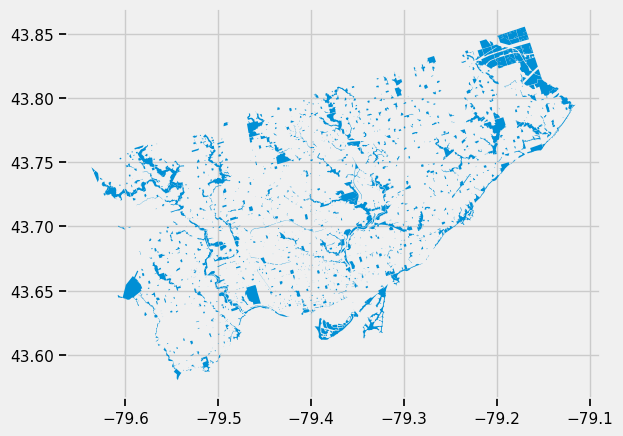

In [13]:
# Plot Data
green_spaces.plot()

## Combine DataSets

In [14]:
# Convert DataSets to Same CRS
parks = parks.to_crs(green_spaces.crs)

# Create Buffer Zone for Parks
parks["geometry"] = parks.buffer(10)

# Identify Overlaps
overlapping_parks = gpd.sjoin(parks, green_spaces, how = "inner", predicate = "intersects")

# Remove Overlaps
non_overlapping_parks = parks[~parks.index.isin(overlapping_parks.index)]

# Combine DataSets
combined_areas = gpd.GeoDataFrame(pd.concat([green_spaces, non_overlapping_parks], ignore_index = True))

# Display DataSet
combined_areas.head(20)

,TYPE,ASSET_NAME,geometry,ADDRESS
0,Park,ROYCROFT PARK LANDS,"POLYGON ((-79.40679 43.68073, -79.40692 43.681...",NaN
1,Park,ART EGGLETON PARK,"POLYGON ((-79.41801 43.65962, -79.4178 43.6590...",NaN
2,Park,BOULTON DRIVE PARKETTE,"POLYGON ((-79.40303 43.67746, -79.40304 43.677...",NaN
3,Park,BENJAMIN BOAKE GREENBELT,"POLYGON ((-79.49585 43.7429, -79.49646 43.7433...",NaN
4,Park,BURNHAMILL PARK,"POLYGON ((-79.58558 43.64234, -79.58529 43.642...",NaN
5,Park,UPPER ROUGE TRAIL PARK,"POLYGON ((-79.17914 43.81192, -79.17924 43.811...",NaN
6,Park,JOEL WEEKS PARK,"POLYGON ((-79.35228 43.65978, -79.35206 43.659...",NaN
7,Open Green Space,GIVENDALE GARDEN PLOTS,"POLYGON ((-79.27347 43.74398, -79.27307 43.744...",NaN
8,Park,LEONARD LINTON PARK,"POLYGON ((-79.35372 43.7139, -79.3536 43.71386...",NaN
9,Park,LESCON PARK,"POLYGON ((-79.35775 43.77853, -79.35788 43.778...",NaN


<Axes: >

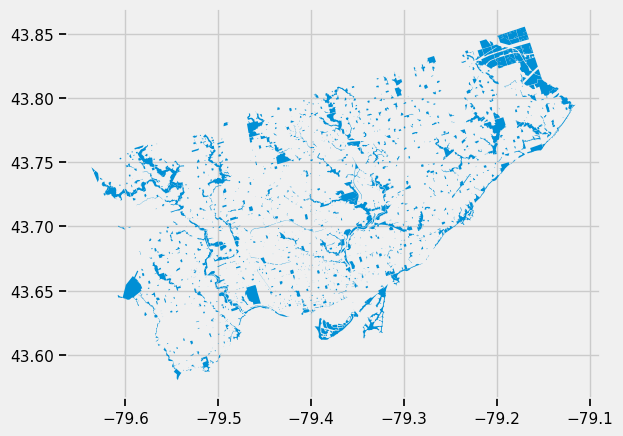

In [15]:
# Plot Data
combined_areas.plot()

## Data Cleaning

In [16]:
# Remove Proposed Facilities
combined_areas['Proposed'] = combined_areas['ASSET_NAME'].str.contains('Proposed')
combined_areas = combined_areas[combined_areas["Proposed"] == False]

In [17]:
combined_areas["ASSET_NAME"].value_counts()

ASSET_NAME
BENNER PARK                    2
ETIENNE BRULE PARK             2
ROYCROFT PARK LANDS            1
GOLDHAWK PARK                  1
EAST TORONTO ATHLETIC FIELD    1
                              ..
LAURENTIDE PARK                1
VEROBEACH PARKETTE             1
TOURAINE PARKETTE              1
PRIMROSE AVENUE PARKETTE       1
CLOUD GARDENS                  1
Name: count, Length: 1632, dtype: int64

In [18]:
# Remove Duplicate Parks
combined_areas = combined_areas.dissolve(by='ASSET_NAME').reset_index()
combined_areas.head()

,ASSET_NAME,geometry,TYPE,ADDRESS,Proposed
0,120 QUEENS QUAY E PARK,"POLYGON ((-79.36891 43.64407, -79.36929 43.644...",Park,None,False
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-79.43096 43.74306, -79.43094 43.743...",Park,None,False
2,174 SOUDAN AVE PARK,"POLYGON ((-79.39187 43.70579, -79.39169 43.705...",Park,None,False
3,175 THE POND RD PARK,"POLYGON ((-79.50589 43.76876, -79.50585 43.768...",Park,None,False
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-79.40018 43.71179, -79.40111 43.711...",Park,None,False


## Data Exploration

In [19]:
# Calculate Areas
combined_areas = combined_areas.to_crs(epsg = 32633)
combined_areas['AREA'] = combined_areas.geometry.area / 1e6

combined_areas.head()

,ASSET_NAME,geometry,TYPE,ADDRESS,Proposed,AREA
0,120 QUEENS QUAY E PARK,"POLYGON ((-5312216.594 10505968.312, -5312122....",Park,None,False,0.002330
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-5295684.01 10511379.406, -5295685.3...",Park,None,False,0.001800
2,174 SOUDAN AVE PARK,"POLYGON ((-5302106.639 10507533.959, -5302103....",Park,None,False,0.000464
3,175 THE POND RD PARK,"POLYGON ((-5290633.045 10519542.664, -5290648....",Park,None,False,0.025816
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-5301047.005 10508386.441, -5301066....",Park,None,False,0.007734


In [20]:
# Sort by Areas
sorted_areas = combined_areas.sort_values(by='AREA', ascending=False)

sorted_areas.head(20)

,ASSET_NAME,geometry,TYPE,ADDRESS,Proposed,AREA
1187,ROUGE PARK,"MULTIPOLYGON (((-5287521.778 10483639.031, -52...",Park,None,False,21.833713
1558,WEST HUMBER PARKLAND,"MULTIPOLYGON (((-5296332.507 10529768.575, -52...",Park,None,False,5.265309
982,MORNINGSIDE PARK,"MULTIPOLYGON (((-5293088.04 10483219.322, -529...",Park,None,False,4.498906
239,CENTENNIAL PARK - ETOBICOKE,"POLYGON ((-5306731.707 10531107.206, -5306741....",Park,None,False,4.458851
1373,TOMMY THOMPSON PARK,"POLYGON ((-5311546.108 10500059.023, -5311577....",Park,None,False,3.778140
422,EAST DON PARKLAND,"MULTIPOLYGON (((-5292018.154 10502497.47, -529...",Park,None,False,3.289739
644,HIGH PARK,"POLYGON ((-5309641.129 10517505.691, -5309637....",Park,None,False,2.942752
523,G. ROSS LORD PARK,"POLYGON ((-5290511.3 10514100.288, -5290529.12...",Park,None,False,2.815316
419,E.T. SETON PARK,"MULTIPOLYGON (((-5303476.804 10501431.323, -53...",Park,None,False,2.694627
250,CHARLES SAURIOL CONSERVATION AREA,"MULTIPOLYGON (((-5301377.567 10498585.925, -53...",Park,None,False,2.055347


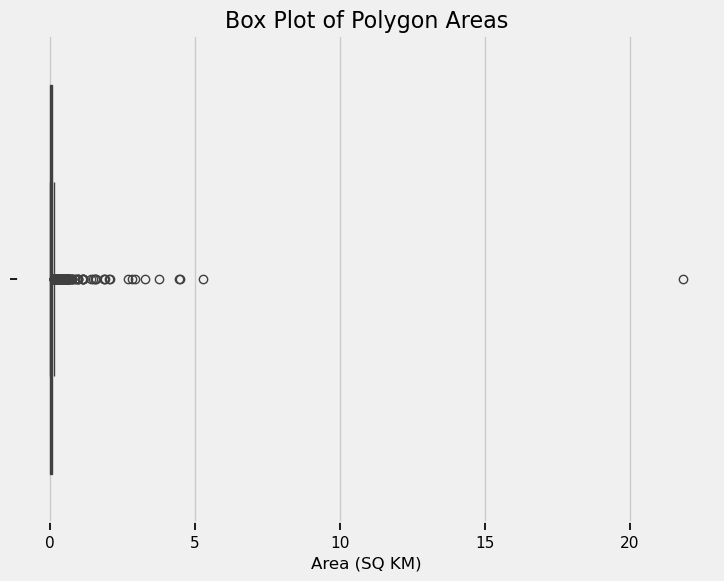

In [21]:
# Plot Area Data
# Create Duplicate DataSet
area_data = combined_areas["AREA"]

# Create Box Plot
plt.figure(figsize = (8, 6))
sns.boxplot(x = area_data)

# Set Features
plt.title("Box Plot of Polygon Areas", fontsize = 16)
plt.xlabel("Area (SQ KM)", fontsize = 12)

# Show Plot
plt.show()


## Export Data

In [22]:
combined_areas.head()

,ASSET_NAME,geometry,TYPE,ADDRESS,Proposed,AREA
0,120 QUEENS QUAY E PARK,"POLYGON ((-5312216.594 10505968.312, -5312122....",Park,None,False,0.002330
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-5295684.01 10511379.406, -5295685.3...",Park,None,False,0.001800
2,174 SOUDAN AVE PARK,"POLYGON ((-5302106.639 10507533.959, -5302103....",Park,None,False,0.000464
3,175 THE POND RD PARK,"POLYGON ((-5290633.045 10519542.664, -5290648....",Park,None,False,0.025816
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-5301047.005 10508386.441, -5301066....",Park,None,False,0.007734


In [23]:
# Drop Unnecessary Columns
combined_areas.drop(columns = ["ADDRESS", "Proposed"], inplace = True)

combined_areas.head()

,ASSET_NAME,geometry,TYPE,AREA
0,120 QUEENS QUAY E PARK,"POLYGON ((-5312216.594 10505968.312, -5312122....",Park,0.002330
1,167 ARMOUR BLVD PARKETTE,"POLYGON ((-5295684.01 10511379.406, -5295685.3...",Park,0.001800
2,174 SOUDAN AVE PARK,"POLYGON ((-5302106.639 10507533.959, -5302103....",Park,0.000464
3,175 THE POND RD PARK,"POLYGON ((-5290633.045 10519542.664, -5290648....",Park,0.025816
4,20 CASTLEFIELD AVE PARK,"POLYGON ((-5301047.005 10508386.441, -5301066....",Park,0.007734


In [24]:
# Export Data into CSV File
combined_areas.to_csv("combined_areas.csv", index = False)

In [25]:
# State CRS
combined_areas.crs

<Projected CRS: EPSG:32633>
Name: WGS 84 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°E and 18°E, northern hemisphere between equator and 84°N, onshore and offshore. Austria. Bosnia and Herzegovina. Cameroon. Central African Republic. Chad. Congo. Croatia. Czechia. Democratic Republic of the Congo (Zaire). Gabon. Germany. Hungary. Italy. Libya. Malta. Niger. Nigeria. Norway. Poland. San Marino. Slovakia. Slovenia. Svalbard. Sweden. Vatican City State.
- bounds: (12.0, 0.0, 18.0, 84.0)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich